### Loan-Approval Prediction

Моя задача заключается в определении того, одобрить ли человеку кредит или нет (задача бинарной классификации). Для принятия этого решения мы будем смотреть на следующие показатели:
* `no_of_dependents` - число иждивенцев у клиента на обеспечении (`int`)
* `education` - наличие образование (`str`)
* `self_employed` - занятость (`str`)
* `income_annum` - годовой доход (`int`)
* `loan_amount` - величина запрашиваемого кредита (`int`)
* `loan_term` - срок займа в годах (`int`)
* `cibil_score` - кредитный рейтинг (оценка платежеспособности) (`int`)
* `residential_assets_value` - стоимость недвижимости клиента (жилого фонда) (`int`)
* `commercial_assets_value` - стоимость коммерческих активов (`int`)
* `luxury_assets_value` - общая стоимость элементов роскоши (украшения, произведения искусства, уникальные матеиральные ценность etc) (`int`)
* `bank_asset_value` - стоимость банковских активов (`int`)
* `loan_status` - результат (Одобрен/не одобрен кредит) (`str`)

Для выполнения задачи классификации воспользуемся разными методами машинного обучения ($kNN, Random Forest$), но прежде, посмотрим на имеющийся датасет, проанализируем и обработаем перед обучением.

In [240]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [241]:
# Загружаем датасет
loans_df = pd.read_csv('loan_approval_dataset.csv')
loans_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [242]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [243]:
# Описание датасета (среднее, разброс etc)
loans_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [244]:
# Кол-во пропущеных полей
loans_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [245]:
# Число дубликатов в датасете
loans_df.duplicated().sum()

0

In [246]:
loans_df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [247]:
# Убираем столбец с номером записи
loans_df.drop(columns=['loan_id'], inplace=True)

In [248]:
# Убираем пробелы из названий признаков
loans_df.rename(columns=lambda x: x.strip(), inplace=True)

In [249]:
# Выбриаем признаки с категориальными значениями
cat_list = loans_df.select_dtypes(include='object').columns.to_list()
cat_list

['education', 'self_employed', 'loan_status']

In [250]:
# Для каждой категории собираем возможные значения
cat_values_list = []
for i in cat_list:
  tmp = loans_df[i].unique().tolist()
  cat_values_list.append(tmp)

cat_values_list

[[' Graduate', ' Not Graduate'], [' No', ' Yes'], [' Approved', ' Rejected']]

In [251]:
# Добавление числовых признаков категорий
loans_df[cat_list[0] + '_num'] = np.where(loans_df[cat_list[0]] == cat_values_list[0][0], 1, 0)
loans_df[cat_list[1] + '_num'] = np.where(loans_df[cat_list[1]] == cat_values_list[1][0], 0, 1)
loans_df[cat_list[2] + '_num'] = np.where(loans_df[cat_list[2]] == cat_values_list[2][0], 1, 0)

loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
 12  education_num             4269 non-null   int32 
 13  self_employed_num         4269 non-null   int32 
 14  loan_status_num         

In [252]:
# Новый датасет с числовыми признаками
loans_df_num = loans_df.select_dtypes(include=np.number)
loans_df_num.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_num,self_employed_num,loan_status_num
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0


In [253]:
# Пример выборки из 10 записей
loans_df_num.sample(10)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_num,self_employed_num,loan_status_num
2757,0,8000000,29800000,12,736,600000,15700000,30800000,8400000,1,0,1
182,0,2800000,9900000,8,742,4900000,1300000,6700000,1700000,0,0,1
2718,3,1400000,2700000,14,819,1200000,1500000,4000000,1300000,1,1,1
3440,0,1200000,4200000,4,768,2800000,2200000,2800000,1500000,1,1,1
1806,1,6200000,16200000,4,888,-100000,12000000,24300000,4000000,1,1,1
1766,2,7500000,29100000,20,815,12400000,9500000,25300000,9100000,0,0,1
2149,1,800000,3000000,4,338,900000,1000000,2600000,400000,1,0,1
3856,2,1200000,4600000,20,605,3600000,1500000,4600000,600000,1,1,1
1355,2,4600000,15600000,2,764,7700000,1500000,16000000,5800000,1,0,1
1471,3,6600000,21400000,10,467,15200000,6000000,20300000,5200000,0,0,0


In [254]:
loans_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   loan_term                 4269 non-null   int64
 4   cibil_score               4269 non-null   int64
 5   residential_assets_value  4269 non-null   int64
 6   commercial_assets_value   4269 non-null   int64
 7   luxury_assets_value       4269 non-null   int64
 8   bank_asset_value          4269 non-null   int64
 9   education_num             4269 non-null   int32
 10  self_employed_num         4269 non-null   int32
 11  loan_status_num           4269 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 350.3 KB


In [255]:
loans_df_num.isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
education_num               0
self_employed_num           0
loan_status_num             0
dtype: int64

In [256]:
# Матрица корреляции
loans_df_num.corr()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_num,self_employed_num,loan_status_num
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.002697,0.000765,-0.018114
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.011625,0.002368,-0.015189
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.010631,0.001450,0.016150
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.008417,0.004107,-0.113036
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.004649,-0.004866,0.770518
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.010930,0.006144,-0.014367
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.006763,-0.017998,0.008246
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.012471,0.004413,-0.015465
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000,0.009424,-0.000215,-0.006778
education_num,0.002697,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,1.000000,-0.023224,0.004918


<Axes: >

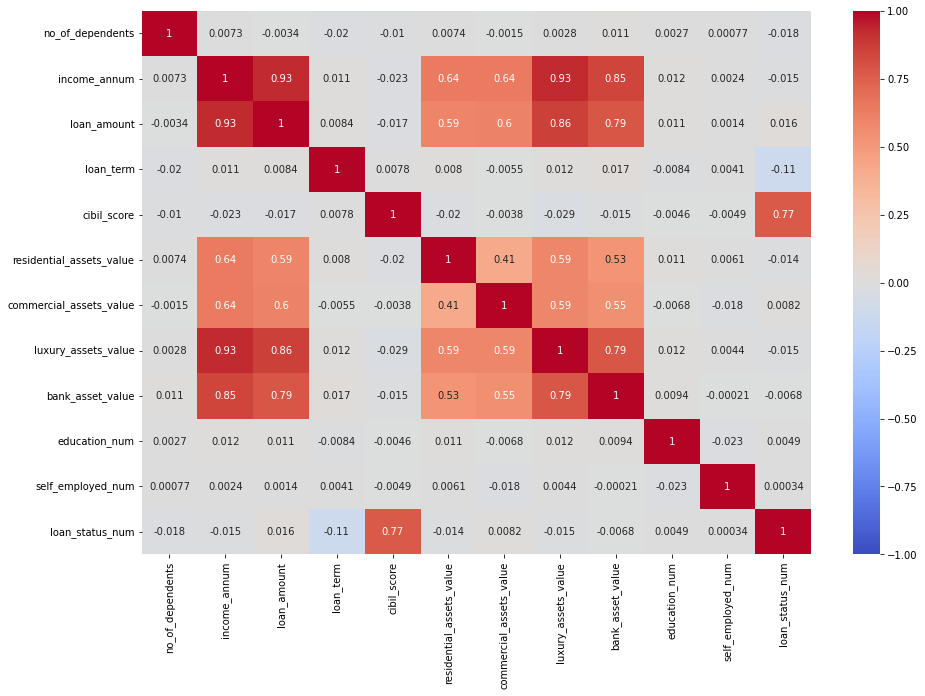

In [257]:
# Корелляционная матрица обработанного датасета на тепловой карте
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.heatmap(loans_df_num.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

На этом этапе можно заметить ряд сильно коррелированых признаков: `luxury_assets_value` - `income_annum`; `luxury_assets_value` - `loan_amount`; `loan_amount` - `income_annum`; `bank_asset_value` - `income_annum`; `bank_asset_value` - `loan_amount`. Признаки `luxury_assets_value`, `loan_amount`, `bank_asset_value` можно попробовать удалить из датасета. Таким образом, мы уменьшим его размер и уменьшим число обрабатываемых данных для обучения при этом, избавившись от не сильно значимых данных (в силу их коррелированости оставшиейся признаки, вероятно, будут достаточны для достижения хороших результатов). Пока что, не будем этого делать.

In [258]:
# Описание обработанного датасета (среднее, разброс etc)
loans_df_num.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_num,self_employed_num,loan_status_num
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.502225,0.503631,0.622160
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.500054,0.500045,0.484904
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000,1.000000,1.000000
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000,1.000000,1.000000


In [259]:
# Нормализуем количеситвенные признаки (нулевое среднее, единичное std)
data_numeric = loans_df_num[['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']]
data_numeric.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [260]:
data_numeric = (data_numeric - data_numeric.mean()) / data_numeric.std()
data_numeric.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,3.495291e-17,1.681069e-16,7.573131e-17,-1.023621e-16,2.596502e-16,3.162406e-17,-9.986546e-18,-5.409379e-17,5.326158e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.473375e+00,-1.731172e+00,-1.640258e+00,-1.558969e+00,-1.739462e+00,-1.164366e+00,-1.133104e+00,-1.628593e+00,-1.531203e+00
25%,-8.837211e-01,-8.404911e-01,-8.219786e-01,-8.583437e-01,-8.521470e-01,-8.107182e-01,-8.369067e-01,-8.377100e-01,-8.235507e-01
50%,2.955866e-01,1.456303e-02,-7.004590e-02,-1.577186e-01,3.708708e-04,-2.879338e-01,-2.900809e-01,-5.781197e-02,-1.158988e-01
75%,8.852405e-01,8.696172e-01,7.040024e-01,8.932191e-01,8.586882e-01,5.884990e-01,5.985110e-01,7.220861e-01,6.532882e-01
max,1.474894e+00,1.724671e+00,2.694412e+00,1.593844e+00,1.740203e+00,3.325429e+00,3.287071e+00,2.644370e+00,2.991616e+00


In [261]:
data =  pd.concat((data_numeric, loans_df_num[['education_num','self_employed_num', 'loan_status_num']]), axis=1)
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_num,self_employed_num,loan_status_num
0,-0.294067,1.617790,1.632860,0.192594,1.032671,-0.779966,2.876952,0.831931,0.930195,1,0,1
1,-1.473375,-0.341710,-0.324376,-0.508031,-1.060927,-0.733838,-0.631847,-0.694912,-0.515876,0,1,0
2,0.295587,1.439653,1.610745,1.593844,-0.544777,-0.057294,-0.107806,1.996286,2.407034,1,0,0
3,0.295587,1.119008,1.721323,-0.508031,-0.770955,1.649444,-0.381219,0.897838,0.899428,1,0,0
4,1.474894,1.689044,1.002564,1.593844,-1.263907,0.757635,0.735218,1.567891,0.007171,0,1,0


In [262]:
# Выделяем массивы с значениями признаков и метками классов
X = data.drop('loan_status_num', axis=1)
Y = data['loan_status_num']

features_name = X.columns
features_name

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_num',
       'self_employed_num'],
      dtype='object')

In [263]:
X = X.to_numpy()
Y = np.array(Y, dtype='int')
Y

array([1, 0, 0, ..., 0, 1, 1])

In [264]:
print(X.shape)
print(Y.shape)
N, d = X.shape

(4269, 11)
(4269,)


In [265]:
# Выделяем тестовую и тренировочную выборку
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

N_train = X_train.shape
N_test = X_test.shape

print(N_train, N_test)

(3415, 11) (854, 11)


Метод $kNN$

In [266]:
# Будем решать задачу классификации с помощью kNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
knn

KNeighborsClassifier(n_neighbors=10)

In [267]:
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test  != Y_test_predict)
err_test

0.09250585480093677

In [268]:
# Матрица ошибок (проанализируем позже)
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, Y_test_predict))

[[297  21]
 [ 58 478]]


In [269]:
# Подберем оптимальный параметр k в kNN
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55, 65, 75]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.06763217917717057 55


In [270]:
# Получим метки с помощью наилучшего kNN
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

Y_test_predict = knn.predict(X_test)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != Y_test_predict)

Y_prob = knn.predict_proba(X_test)[:, 1]

print(err_train, err_test)

0.06207906295754027 0.07611241217798595


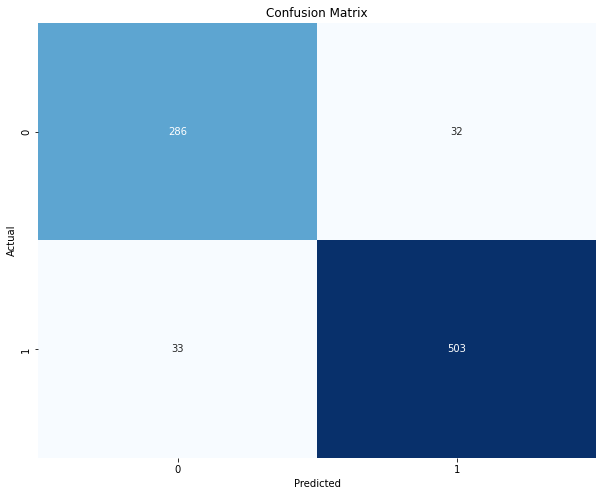

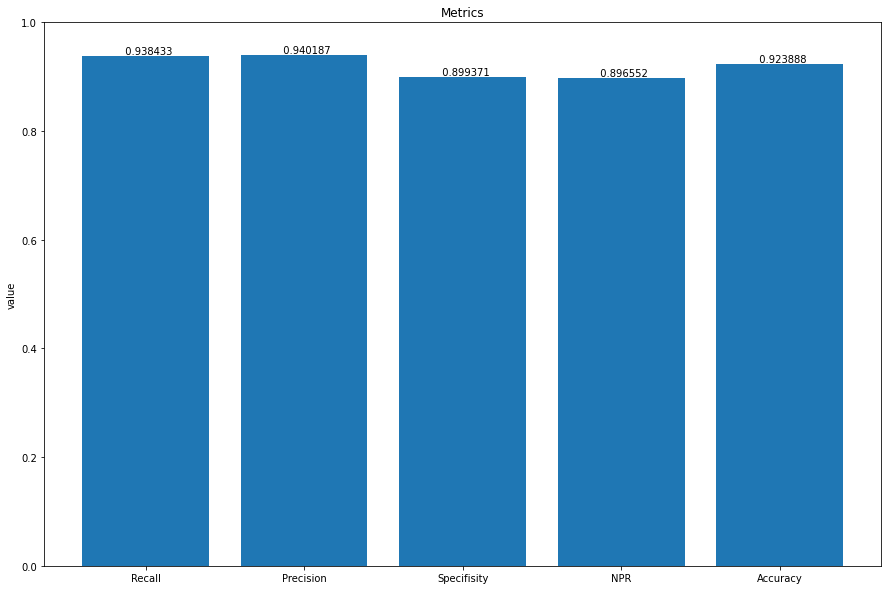

In [271]:
# Проанализируем матрицу ошибок и выведем несколько метрик

def plot_ConfMatrix(cm):
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.title('Confusion Matrix')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  
def plot_metrics(cm):
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  TN = cm[0][0]

  recall = TP / (TP + FN)
  prec = TP / (TP + FP)
  spec = TN / (TN + FP)
  NPR = TN / (TN + FN)
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  
  m_names = ['Recall', 'Precision', 'Specifisity', 'NPR', 'Accuracy']
  m_vals = [recall, prec, spec, NPR, accuracy]
  
  fig, ax = plt.subplots()
  bar_container = ax.bar(m_names, m_vals)
  ax.set(ylabel='value', title='Metrics', ylim=(0, 1))
  ax.bar_label(bar_container, fmt='{:10f}')

conf = confusion_matrix(Y_test, Y_test_predict)
plot_ConfMatrix(conf)
plot_metrics(conf)

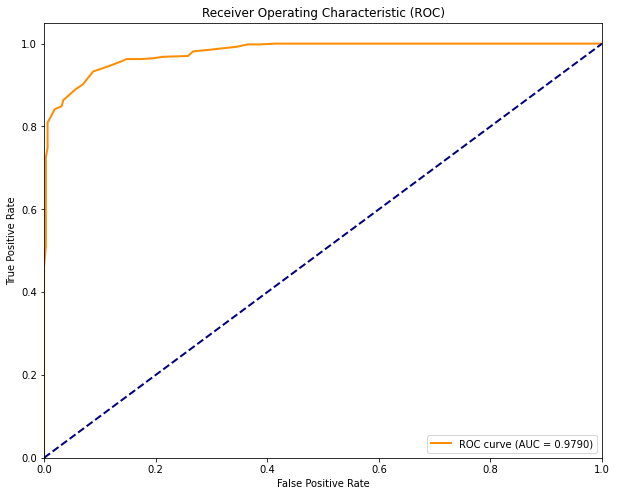

In [272]:
# Построим ROC-кривую
from sklearn.metrics import roc_curve, auc

def plot_ROC(y_prob, y_test):
  if y_prob is not None:
      fpr, tpr, thresholds = roc_curve(y_test, y_prob)
      roc_auc = auc(fpr, tpr)

      plt.figure(figsize=(10, 8))
      plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC)')
      plt.legend(loc="lower right")
      plt.show()
plot_ROC(Y_prob, Y_test)

### Выводы:


В рамках проделанной работы была произведена обработка выбранного датасета, датасет был поделен на тестовую и тренировочную выборку. После чего была обучена модель $kNN$ для которой также был подобран оптимальный гиперпараметр $k = 55$. Были вычесленны основные метрики полученные на данной модели и результат оказался довольно неплохой: $Accuracy = 0.924, Recall = 0.938, Precision = 0.94$. В рамках моей задачи можно выделить метрики $Recall$ и $Precision$ так как важно, чтобы они были довольно высокими (из "физического" смысла задачи). Так что метод $kNN$ хорошо справляется с поставленной задачей.

Метод $kNN$ с уменьшенным числом признаков (без сильно коррелированных)

In [273]:
# Выделяем массивы с значениями признаков и метками классов
X = data.drop(['loan_status_num', 'luxury_assets_value', 'loan_amount', 'bank_asset_value'], axis=1)
Y = data['loan_status_num']

features_name = X.columns
features_name

Index(['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value', 'education_num',
       'self_employed_num'],
      dtype='object')

In [274]:
X = X.to_numpy()
Y = np.array(Y, dtype='int')
Y

array([1, 0, 0, ..., 0, 1, 1])

In [275]:
print(X.shape)
print(Y.shape)
N, d = X.shape

(4269, 8)
(4269,)


In [276]:
# Выделяем тестовую и тренировочную выборку
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

N_train = X_train.shape
N_test = X_test.shape

print(N_train, N_test)

(3415, 8) (854, 8)


In [277]:
# Будем решать задачу классификации с помощью kNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
knn

KNeighborsClassifier(n_neighbors=10)

In [278]:
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test  != Y_test_predict)
err_test

0.09484777517564402

In [279]:
# Матрица ошибок (проанализируем позже)
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, Y_test_predict))

[[293  25]
 [ 56 480]]


In [280]:
# Подберем оптимальный параметр k в kNN
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55, 65, 75]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.06880348476273779 55


In [285]:
# Получим метки с помощью наилучшего kNN
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

Y_test_predict_red = knn.predict(X_test)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != Y_test_predict_red)

Y_prob_red = knn.predict_proba(X_test)[:, 1]

print(err_train, err_test)

0.06559297218155198 0.08079625292740047


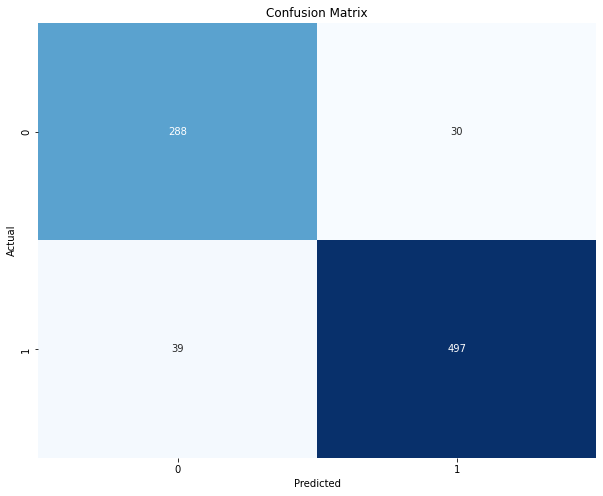

[0.9272388059701493, 0.9430740037950665, 0.9056603773584906, 0.8807339449541285, 0.9192037470725996, 0.9384328358208955, 0.9401869158878504, 0.89937106918239, 0.896551724137931, 0.9238875878220141]


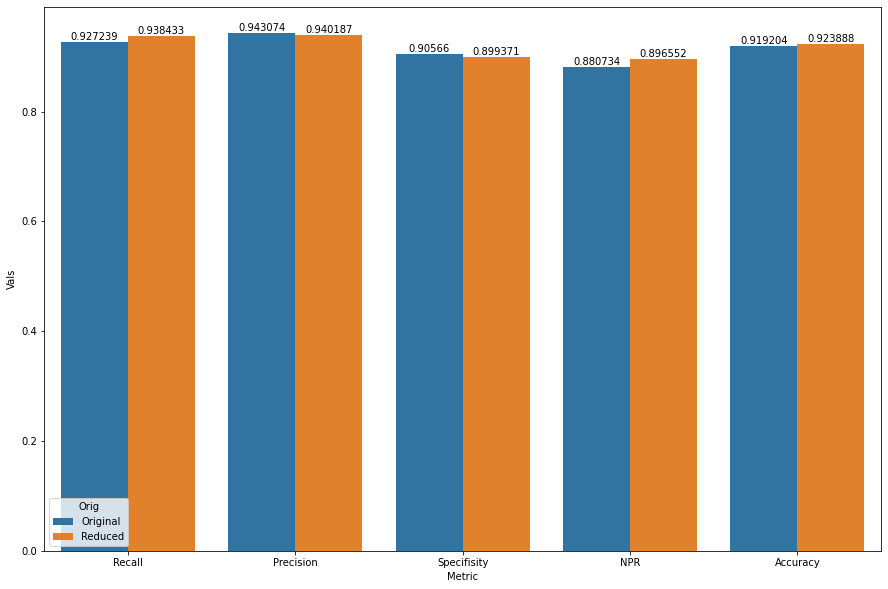

In [286]:
# Проанализируем матрицу ошибок и выведем несколько метрик

def plot_metrics_compare(cm1, cm2):
  TP1 = cm1[1][1]
  FN1 = cm1[1][0]
  FP1 = cm1[0][1]
  TN1 = cm1[0][0]

  recall1 = TP1 / (TP1 + FN1)
  prec1 = TP1 / (TP1 + FP1)
  spec1 = TN1 / (TN1 + FP1)
  NPR1 = TN1 / (TN1 + FN1)
  accuracy1 = (TP1 + TN1) / (TP1 + TN1 + FP1 + FN1)
  
  TP2 = cm2[1][1]
  FN2 = cm2[1][0]
  FP2 = cm2[0][1]
  TN2 = cm2[0][0]

  recall2 = TP2 / (TP2 + FN2)
  prec2 = TP2 / (TP2 + FP2)
  spec2 = TN2 / (TN2 + FP2)
  NPR2 = TN2 / (TN2 + FN2)
  accuracy2 = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)
  m_names = ['Recall', 'Precision', 'Specifisity', 'NPR', 'Accuracy']
  m_vals1 = [recall1, prec1, spec1, NPR1, accuracy1]
  m_vals2 = [recall2, prec2, spec2, NPR2, accuracy2]
  
  bars = {
    'Metric' : m_names * 2,
    'Vals' : m_vals1 + m_vals2,
    'Orig' : ['Original', 'Original', 'Original', 'Original', 'Original', 'Reduced', 'Reduced', 'Reduced', 'Reduced', 'Reduced']
  }

  df = pd.DataFrame(bars)
  ax = sns.barplot(x='Metric', y='Vals', hue="Orig", data=df)
  ax.bar_label(ax.containers[0], fontsize=10)
  ax.bar_label(ax.containers[1], fontsize=10)
  
  print(bars['Vals'])
  
conf_reduced = confusion_matrix(Y_test, Y_test_predict_red)
plot_ConfMatrix(conf_reduced)
plot_metrics_compare(conf_reduced, conf)

C:\Users\Professional\AppData\Local\Temp\ipykernel_1852\2123899622.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


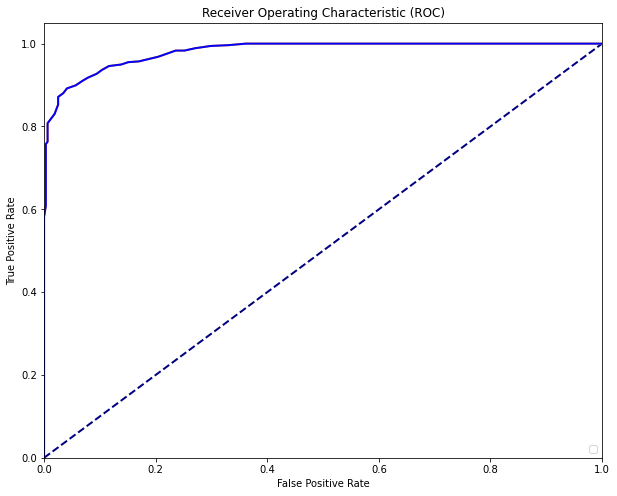

In [295]:
# Построим ROC-кривую
from sklearn.metrics import roc_curve, auc

def plot_ROC_compare(y_prob1, y_prob2, y_test):
  plt.figure(figsize=(10, 8))
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  if y_prob1 is not None:
      fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
      roc_auc = auc(fpr, tpr)

      plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
      
  if y_prob2 is not None:
      fpr, tpr, thresholds = roc_curve(y_test, y_prob2)
      roc_auc = auc(fpr, tpr)

      plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')      
  plt.show()
plot_ROC_compare(Y_prob, Y_prob_red, Y_test)


Сравнение с $kNN$ в изначальном наборе признаков

По последним двум графикам видно, что разница между исходным набором и набором с уменьшенным числом признаков минимальна и сильно зависисмые признаки в случае $kNN$ можно исключать.

Метод $Random Forest$

In [299]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, Y_train)

Y_test_predict = rf.predict(X_test)

err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != Y_test_predict)

Y_prob = rf.predict_proba(X_test)[:, 1]

print(err_train, err_test)

0.0 0.03747072599531616


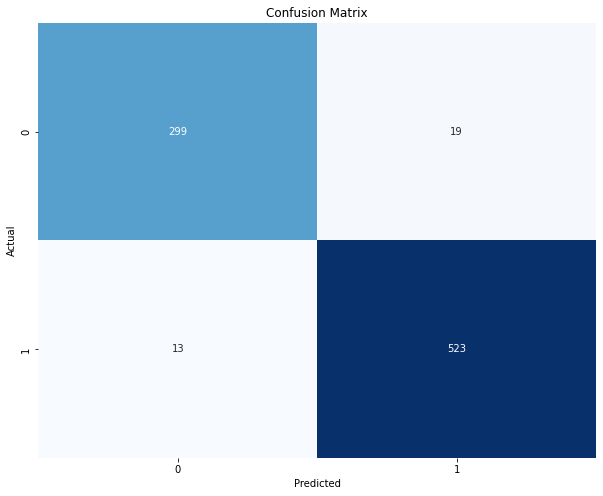

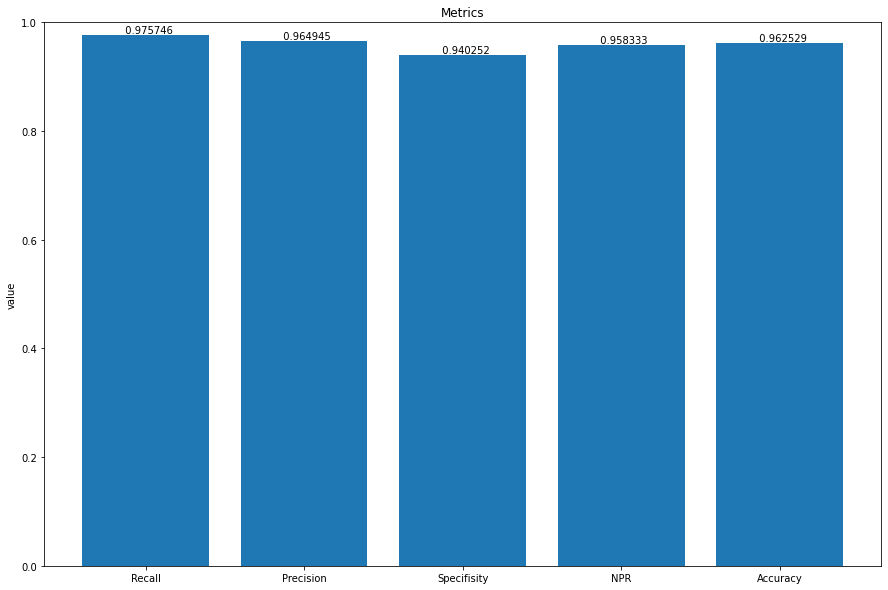

In [300]:
# Проанализируем матрицу ошибок и выведем несколько метрик
conf = confusion_matrix(Y_test, Y_test_predict)
plot_ConfMatrix(conf)
plot_metrics(conf)

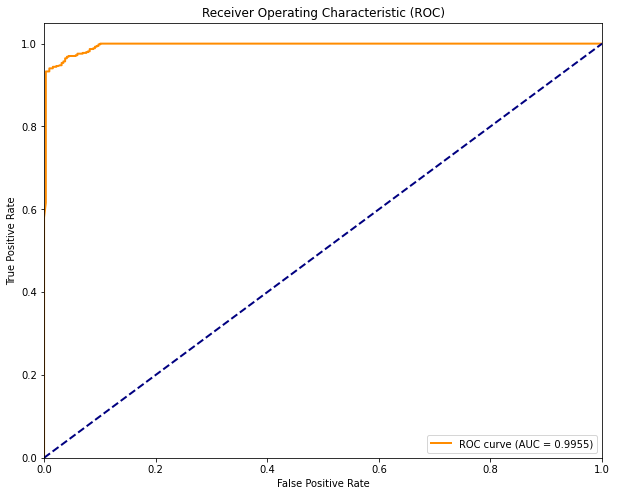

In [301]:
# Построим ROC-кривую
from sklearn.metrics import roc_curve, auc

def plot_ROC(y_prob, y_test):
  if y_prob is not None:
      fpr, tpr, thresholds = roc_curve(y_test, y_prob)
      roc_auc = auc(fpr, tpr)

      plt.figure(figsize=(10, 8))
      plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC)')
      plt.legend(loc="lower right")
      plt.show()
plot_ROC(Y_prob, Y_test)

### Вывод (дополнительно):
Видим, что на нашей выборке случайный лес дает результаты лучше, чем в случае $kNN$ (см. $AUC, Recall, Precision$). Возможно, его применение будет более оправданным.